In [8]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [51]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerias para modelos de ciencia de Datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [16]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./heart_disease.csv')

In [17]:
#1. Analisis Exploratorio de los Datos:

data.head(50)

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,heart_rate,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [19]:
#Descripcion de los datos

data.describe()

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,heart_rate,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Attribute Information:

age — age in yea
rs
sex — sex (1 = male; 0 = female)
cp — chest pain type Value 1: typical angina Value 2: atypical angina Value 3: non-anginal pain Value 4: asymptomatic
trestbps — resting blood pressure (in mm Hg on admission to the hospital)
chol — serum cholestoral in mg/dl
fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg — resting electrocardiographic results Value 0: normal Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
thalach — maximum heart rate achieved
exang — exercise induced angina (1 = yes; 0 = no)
oldpeak — ST depression induced by exercise relative to rest
slope — the slope of the peak exercise ST segment Value 1: upsloping Value 2: flat Value 3: downsloping
ca — number of major vessels (0–3) colored by flourosopy
thal — 3 = normal; 6 = fixed defect; 7 = reveconditionble defect
num — (the predicted attribute) — diagnosis of heart disease (angiographic disease status) Value 0: < 50% diameter narrowing Value 1: > 50% diameter narrowing

In [20]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,age,gender,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiogram,heart_rate,exang,oldpeak,slope,ca,thal,condition
count,297,297,297,297,297,297,297,297,297,297,297,297,297,297
mean,54.5421,0.676768,2.15825,131.694,247.35,0.144781,0.996633,149.599,0.326599,1.05556,0.602694,0.676768,0.835017,0.461279
std,9.04974,0.4685,0.964859,17.7628,51.9976,0.352474,0.994914,22.9416,0.469761,1.16612,0.618187,0.938965,0.95669,0.49934
min,29,0,0,94,126,0,0,71,0,0,0,0,0,0
25%,48,0,2,120,211,0,0,133,0,0,0,0,0,0
50%,56,1,2,130,243,0,1,153,0,0.8,1,0,0,0
75%,61,1,3,140,276,0,2,166,1,1.6,1,1,2,1
max,77,1,3,200,564,1,2,202,1,6.2,2,3,2,1


Text(0.5, 1.0, 'Identificación Datos Faltantes')

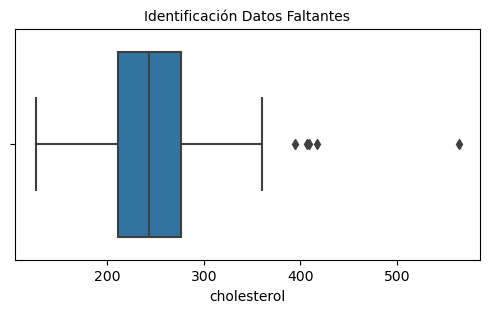

In [24]:
# Grafico para identificar valores faltantes

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['cholesterol'])
plt.title('Identificación Datos Faltantes', fontsize=10)

In [22]:
#Revisamos Datos Faltantes

print ("Presion Sanguinea sin registro: ",data['blood_pressure'].isin([0]).sum())
print ("Colesterol sin registro: ",data['cholesterol'].isin([0]).sum())
print ("Ritmo Cardiaco sin registro: ",data['heart_rate'].isin([0]).sum())

Presion Sanguinea sin registro:  0
Colesterol sin registro:  0
Ritmo Cardiaco sin registro:  0


Text(0.5, 1.0, 'Identificación Datos Atípicos')

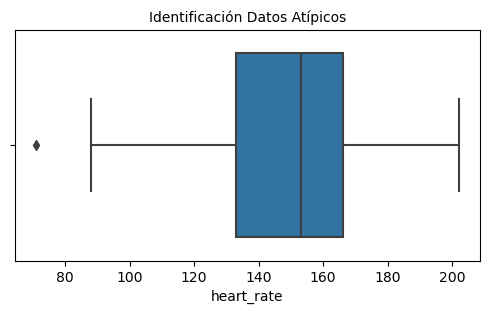

In [26]:
# Grafico para identificar valores Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['heart_rate'])
plt.title('Identificación Datos Atípicos', fontsize=10)

In [31]:
#Conteo Datos atipicos

hr_min=90
hr_max=190
total_atipicos=((data['heart_rate']<hr_min)|(data['heart_rate']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 6


In [32]:
#Filtrar datos atipicos
data=data[(data['heart_rate']<hr_max)&(data['heart_rate']>hr_min)]

In [33]:
#Revisar que fueron filtrados

hr_min=90
hr_max=190
total_atipicos=((data['heart_rate']<hr_min)|(data['heart_rate']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 296
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                289 non-null    int64  
 1   gender             289 non-null    int64  
 2   chest_pain         289 non-null    int64  
 3   blood_pressure     289 non-null    int64  
 4   cholesterol        289 non-null    int64  
 5   blood_sugar        289 non-null    int64  
 6   electrocardiogram  289 non-null    int64  
 7   heart_rate         289 non-null    int64  
 8   exang              289 non-null    int64  
 9   oldpeak            289 non-null    float64
 10  slope              289 non-null    int64  
 11  ca                 289 non-null    int64  
 12  thal               289 non-null    int64  
 13  condition          289 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.9 KB


condition — (El Valor que nos interesa) — diagnosis of heart disease (angiographic disease status) Value 0: < 50% diameter narrowing Value 1: > 50% diameter narrowing

In [35]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es detectar la presencia de una enfermedad cardíaca.

data['condition'].value_counts()

condition
0    156
1    133
Name: count, dtype: int64

In [36]:
data['condition'].head(30)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    1
27    0
28    1
29    0
30    0
Name: condition, dtype: int64

In [38]:
#4. Dividir el dataset en Train y Test para evaluar:
#Usamos 75% para entrenamiento y 25% para pruebas

X = data.drop('condition',axis=1)
Y = data['condition']

#Se usa la funcion train_test_split para separar el bloque de entrenamiento:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [42]:
print(X_train)

     age  gender  chest_pain  blood_pressure  cholesterol  blood_sugar  \
275   45       1           3             104          208            0   
23    74       0           1             120          269            0   
93    60       1           2             140          185            0   
292   40       1           3             152          223            0   
72    76       0           2             140          197            0   
..   ...     ...         ...             ...          ...          ...   
143   43       1           2             130          315            0   
202   60       1           3             140          293            0   
240   55       1           3             132          353            0   
181   63       0           3             108          269            0   
233   57       1           3             132          207            0   

     electrocardiogram  heart_rate  exang  oldpeak  slope  ca  thal  
275                  2         148      1

In [43]:
print(Y_train)

275    0
23     0
93     1
292    1
72     0
      ..
143    0
202    1
240    1
181    1
233    0
Name: condition, Length: 216, dtype: int64


In [44]:
#5. Entrenar el modelo configurando los diferentes hiperparámetros.

mod_regresion = LogisticRegression(solver = "liblinear")
mod_regresion.fit (X_train, Y_train)

#Modelo de Prediccion

prediccion = mod_regresion.predict(X_test)

In [45]:
print (Y_test)

244    1
33     1
248    1
167    1
272    0
      ..
128    1
140    0
111    0
221    1
107    0
Name: condition, Length: 73, dtype: int64


In [46]:
print (prediccion)

[1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1]


In [47]:
#6. Evaluar el desempeño del modelo en el conjunto de Test

print (classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.88      0.85      0.87        34

    accuracy                           0.88        73
   macro avg       0.88      0.88      0.88        73
weighted avg       0.88      0.88      0.88        73



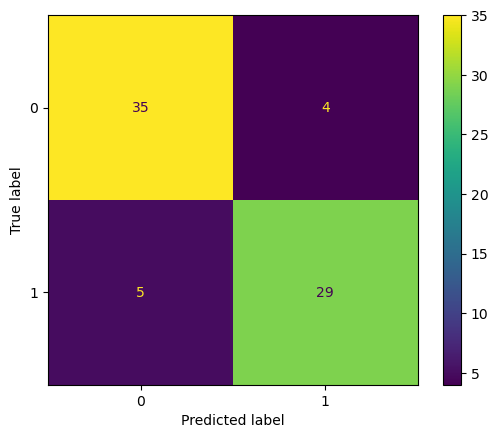

In [49]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

mc=confusion_matrix(Y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=mc)
disp.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

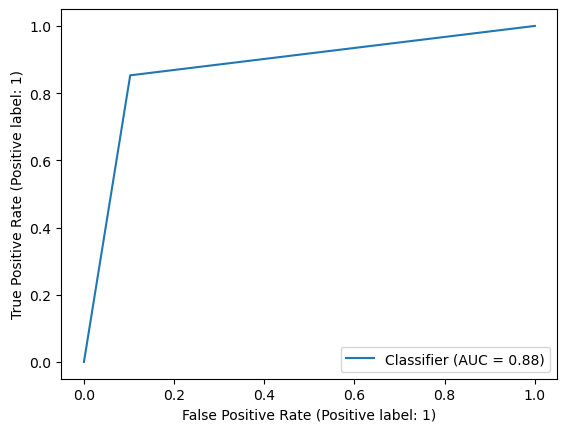

In [52]:
RocCurveDisplay.from_predictions(Y_test, prediccion)
plt.show

#8. Interpretar, analizar y documentar los resultados obtenidos.

Grafica Matriz de confusion:
35 veces el algoritmo predijo que el paciente NO tenía condiciones cardiacas de manera acertada.
29 veces el algoritmo predijo que el paciente SI tenía condiciones cardiacas de manera acertada.
5 veces el algoritmo predijo que el peciente NO tenía condiciones cardiacas, pero en realidad SI.
4 veces el algoritmo predijo que el paciente Si tenía condiciones cardiacas, pero en realidad NO.

Grafica Curva ROC
Nos muestra como resultado un AUC = 0.88, lo cual se puede interpretar como un 88% de predicciones acertadas.
